# A 3D map of Roraima Mount with pygmt

This tutorial shows how to create a 3D map of one of the highest mount in the Pacaraima chain of Tepuis (table-top mountain - see at https://lacgeo.com/mount-roraima-pacaraima-mountains), also known as South America plateux. It is located at the triple border of Venezuela, Brazil and Guyana with a characteristic large flat-topped mountain surrounded by cliffs 400 to 1,000 meters high. 

We will use a sequence of commands with PyGMT, a Python wrapper for the Generic Mapping Tools (GMT), and the Earth Relief Database.

Author: [A.L.Belem](https://github.com/andrebelem) @ 2022

## first, some options

You can run this notebook using your local pygmt installation, or via Binder, or even Google Colaboratory. See comments for each option below. 

## A short note if you are using COLAB<br>
<a href="https://github.com/andrebelem/pythonverse/Roraima_Mount_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The version of python in COLAB is different from what the newer GMT needs to install along with pygmt. So, one way around this problem is to reinstall GMT from scratch, along with other important packages. This is done with this block of commands below.

**comment out the first line of the block (%%script echo skipping) if you want to use colab**

In [1]:
%%script echo skipping
# because I like to enjoy my coffee in silence, it takes time.  
# (3 runs averaged 6 minutes to install everything ! keep drinking your coffee)
# comment the %%capture line if you wnat to see the colab VM working
%%capture
!sudo apt update 
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
# clone gmt from source
!git clone --depth 50 https://github.com/GenericMappingTools/gmt
# cmake everything
!cmake /content/gmt
# build and install
!cmake --build . --target install

# and last but not least
!pip install pygmt

# and if you don't believe in it
!gmt --version
!python --version

skipping


## Some tips

Mount Roraima is located in the Guiana Shield and occupies approx. 30,000 square kilometers, within the Canaima National Park of Venezuela. Therefore, the selection below was made based on a park bounding box. Be careful if you are going to enlarge the area because the resolution of Global Relief can generate a very large file.

In [3]:
Mt_Roraima = [-(61+(0+16/60)/60),
              -(60+(37+27/60)/60),
              +(5+(6+18/60)/60),
              +(5+(17+42/60)/60),]

Now let's get a subset of this region with a resolution of 3 seconds of degree using `pygmt.datasets`. In the same block, we removed a global grid with 1 degree of resolution for the inset.

In [4]:
import pygmt

globe = pygmt.datasets.load_earth_relief(region='g',resolution="01d")

# get etopo around Roraima Mount
topo_pakaraima = pygmt.datasets.load_earth_relief(region=Mt_Roraima,resolution="03s")

grdcut [WARNING]: (w - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: w reset from -61.0044444444 to -61.005


To get an idea of the maximum and minimum altitudes within this region:

In [5]:
print(f'Min topo value:{topo_pakaraima.min().values} max:{topo_pakaraima.max().values}')


Min topo value:506.0 max:2718.0


And now a small map of the extracted region. Note the `shading` values and the image size.

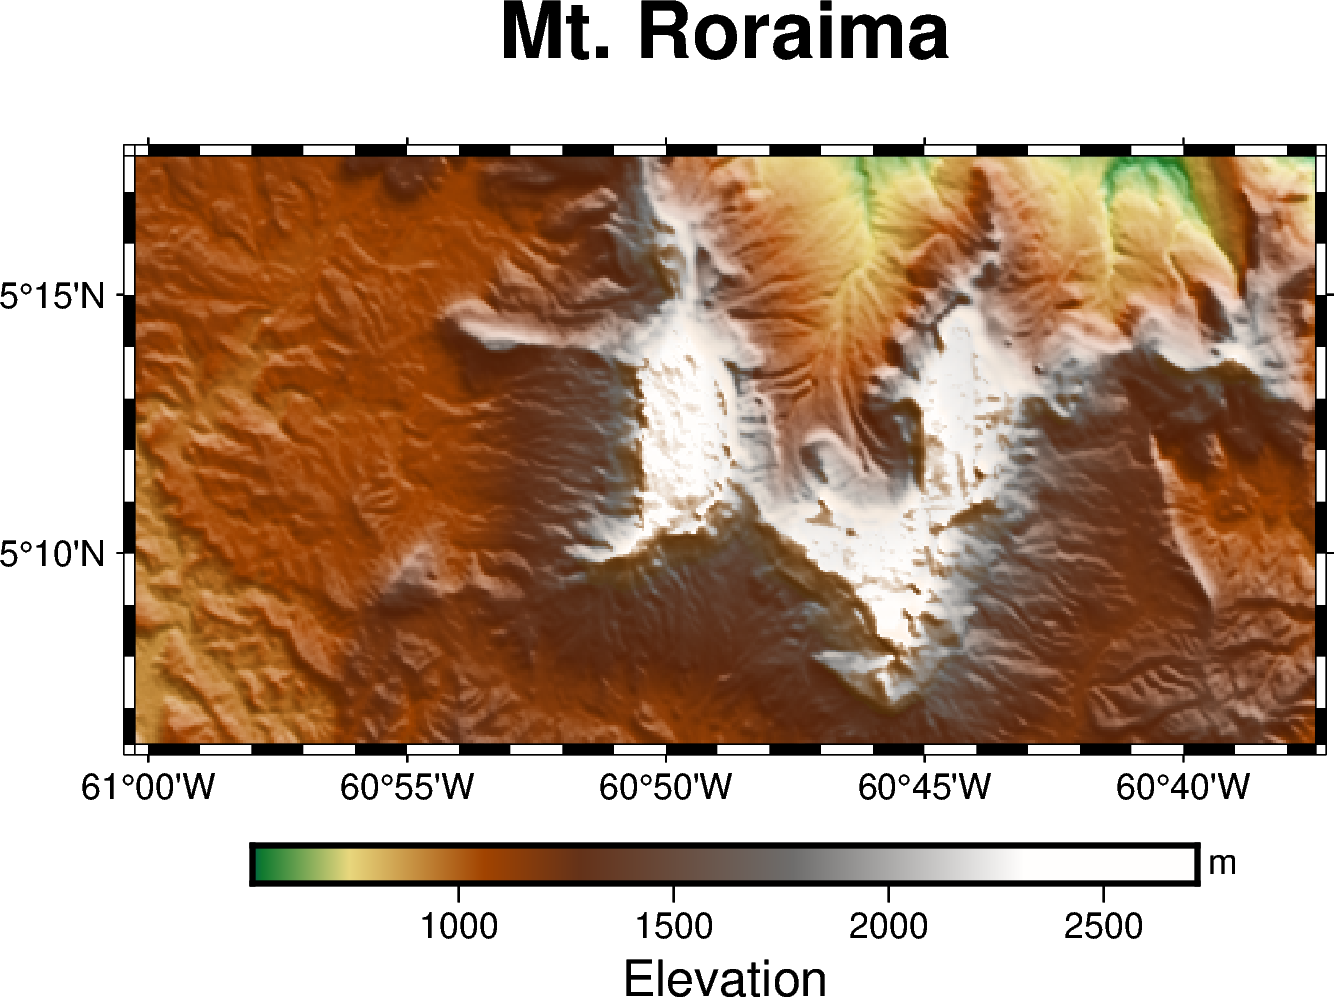

In [6]:
fig = pygmt.Figure()
fig.grdimage(grid=topo_pakaraima,
             projection='M10c',
             region=Mt_Roraima,
             cmap='geo',
             frame=['a5mf1m','+t"Mt. Roraima"'],
             shading='+a20+nt1')

fig.colorbar(frame=["a500", "x+lElevation", "y+lm"])
fig.show()

Finally, let's make a 3D map. The important thing here is the boundary (`region`), projection (`perspective`) and `shading` conditions, which give the map this more interesting appearance.

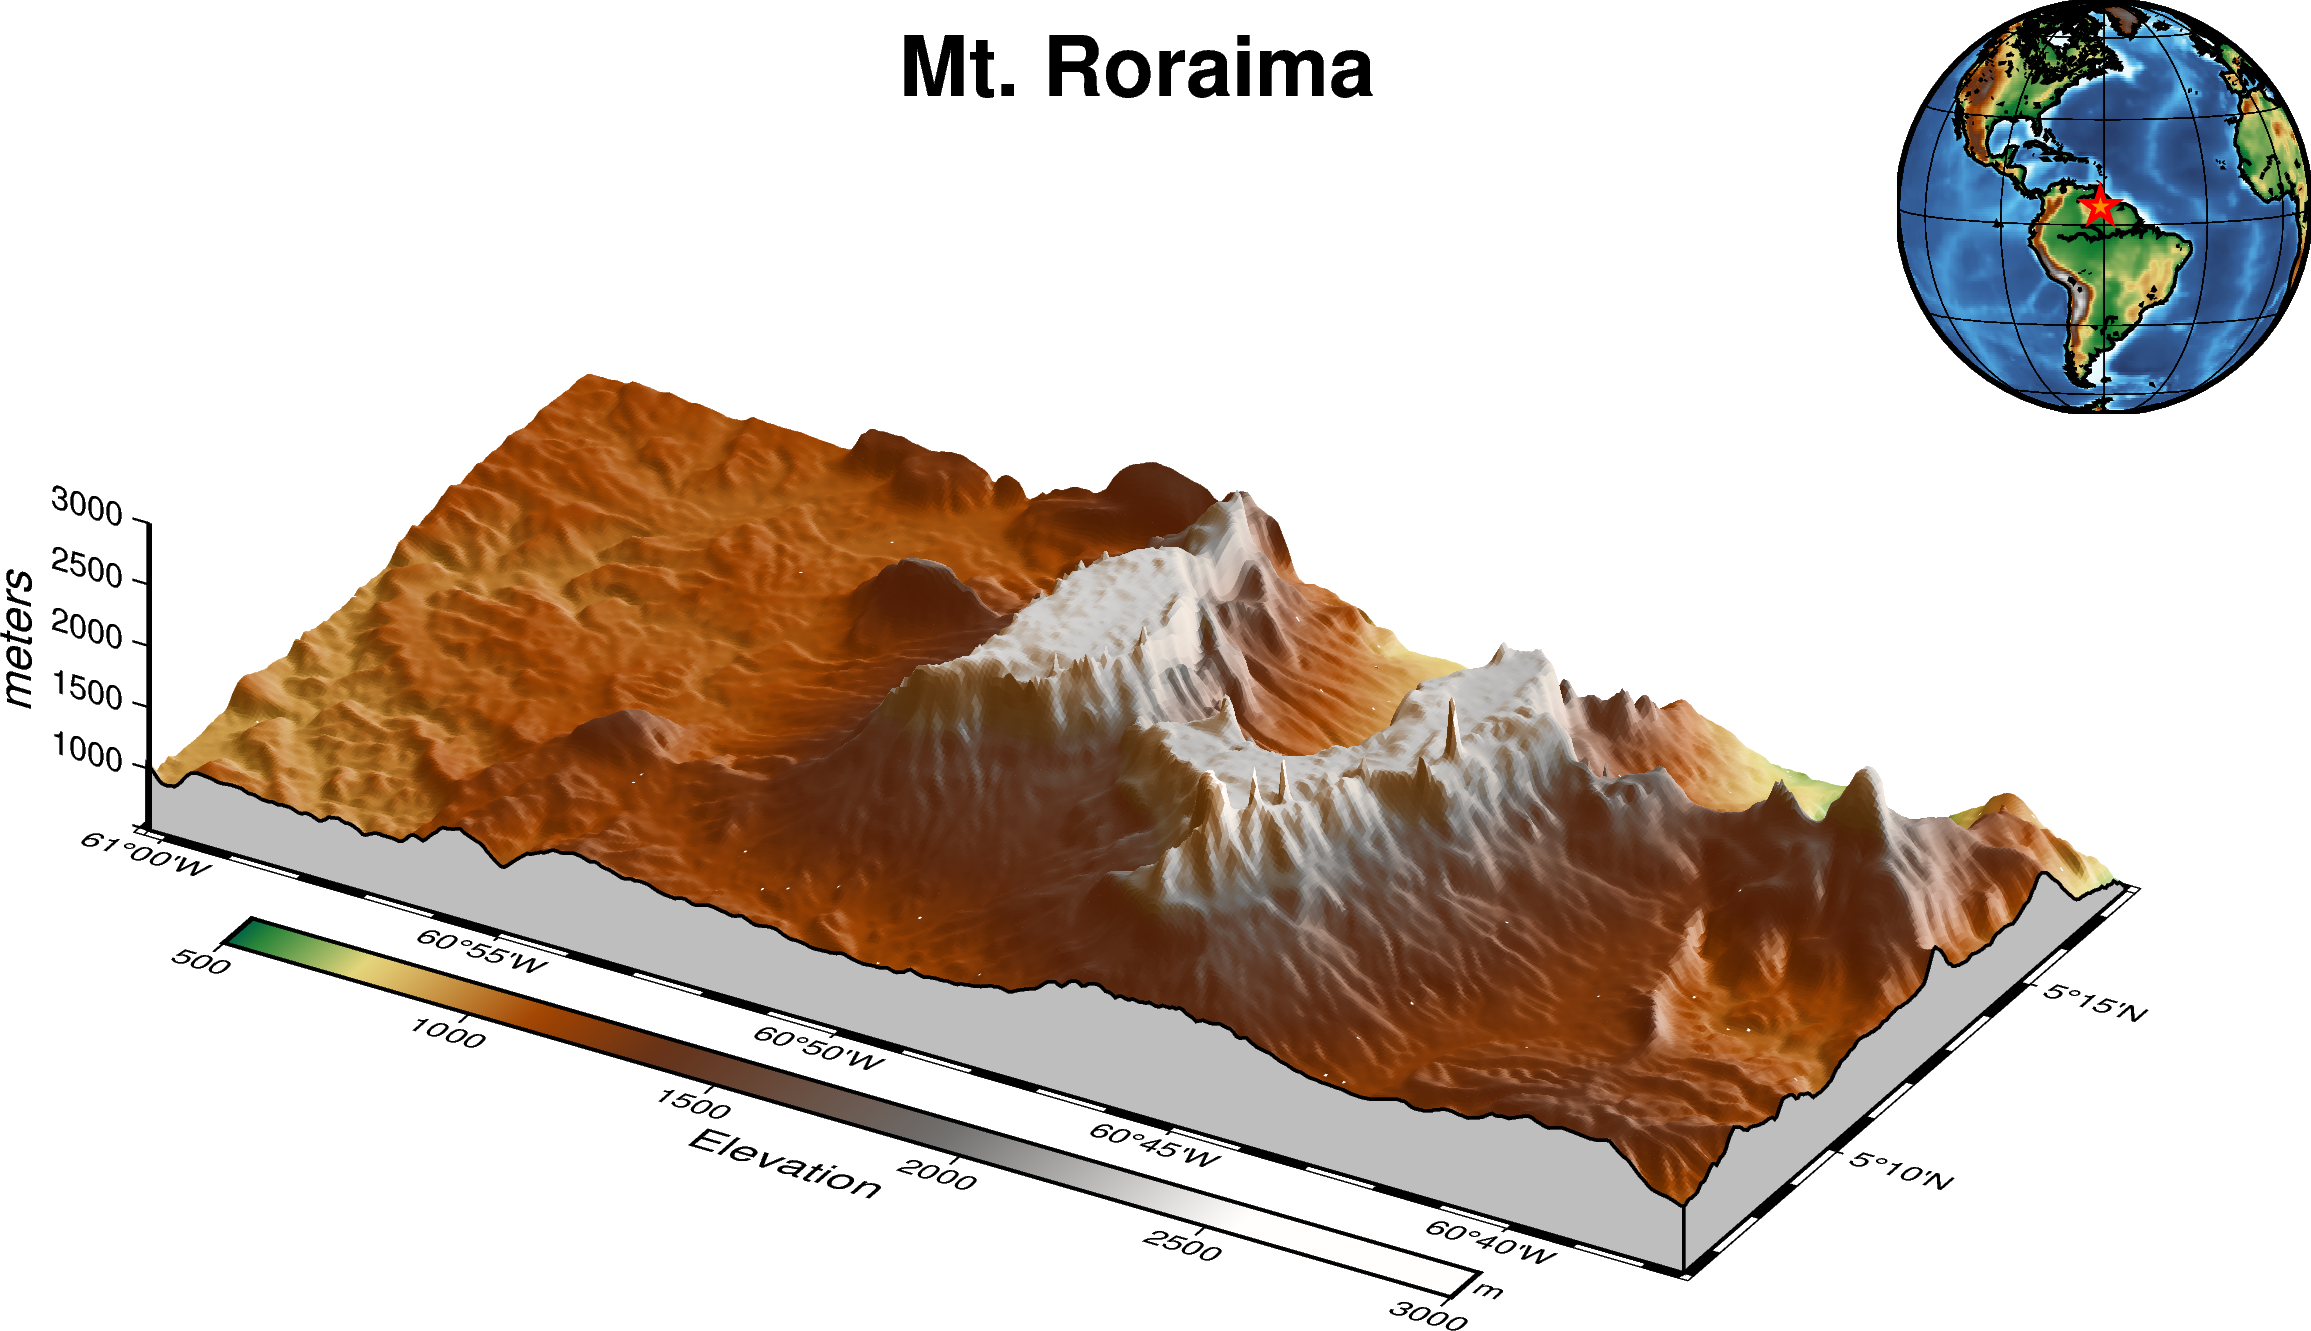

In [7]:
fig = pygmt.Figure()
# note I can add projection, after cmap and after, frame (and control frame)
frame =  ['a5mf1m','a5mf1m', "z500+lmeters", 'wSEnZ+t"Mt. Roraima"']

topo_cpt = pygmt.makecpt(cmap='geo',series=f'500/3000/50',continuous=True)

fig.grdview(grid=topo_pakaraima,
            region=Mt_Roraima+[500,3000],
            frame=frame,
            perspective=[150,30],
            projection='M15c',
            zsize='3c',
            surftype='s',
            cmap=topo_cpt,
            plane="500+ggrey",
            shading='+a20+nt1',
            # Set the contour pen thickness to "0.1p"
            #contourpen="0.1p",
           )

fig.colorbar(perspective=True, frame=["a500", "x+lElevation", "y+lm"])

with fig.inset(position="JTR+w3.5c+o-0.2c", margin=0, box=None):
    # Create a figure in the inset using the global projection centered at Roraima Mt.
    fig.grdimage(grid=globe,region='g',frame='g',projection='G300/5/3.5c"',cmap='geo')
    fig.coast(region='g',shorelines="thin", frame="g")
    fig.plot(x=Mt_Roraima[0],y=Mt_Roraima[2],region='g',style='a0.3c',pen='1p,red',color='darkorange')
    
fig.show()

I hope that you enjoyed. Have fun.